In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import missingno as msno 

In [3]:
data = pd.read_csv("../data/bank-additional-full.csv",  delimiter=';')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Analyze Missing Values

In [42]:
# replace unknows with NaNs to indicate missing values
data = data.replace("unknown", np.nan)

In [43]:
# Total number of missing values
data.isnull().sum().sum()

12718

In [44]:
# Total missing values for each feature
data.isnull().sum(axis = 0)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

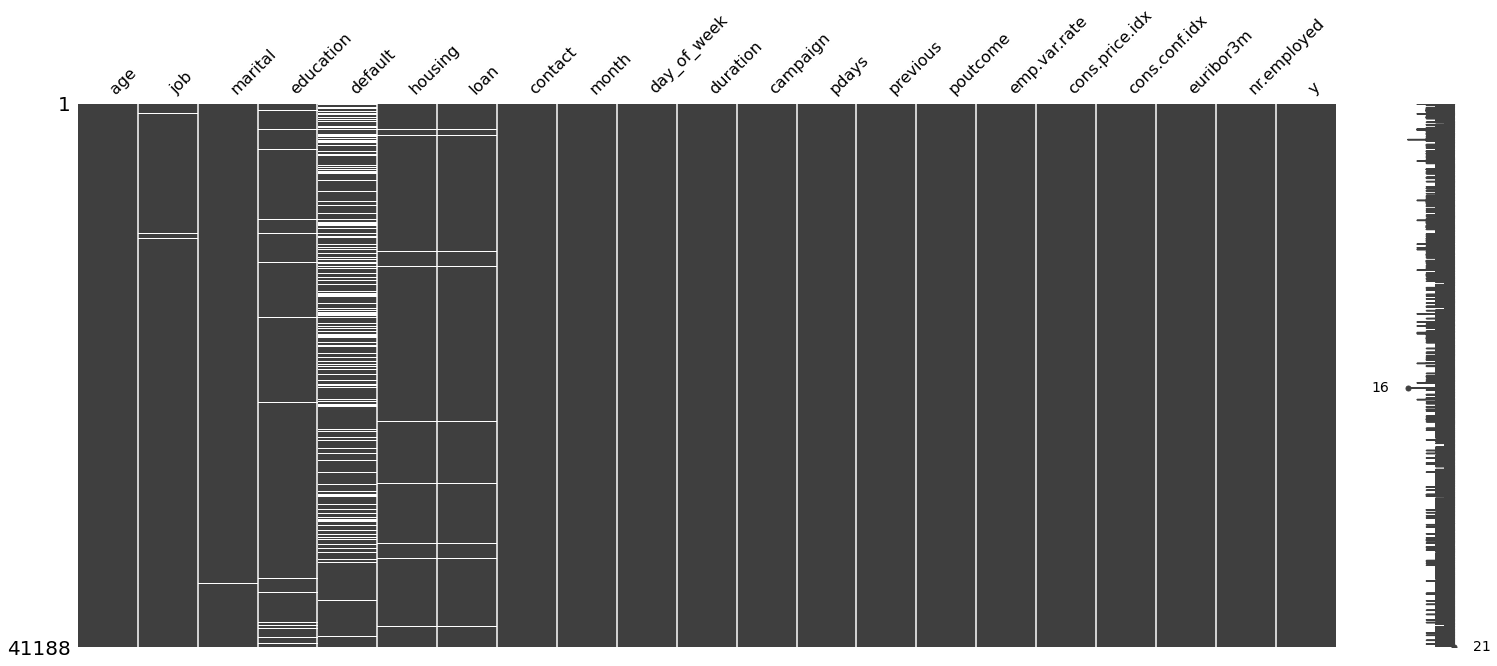

In [45]:
# Default has the most missing values

# Visualize missing values as a matrix
# White lines shows missing data
msno.matrix(data) 

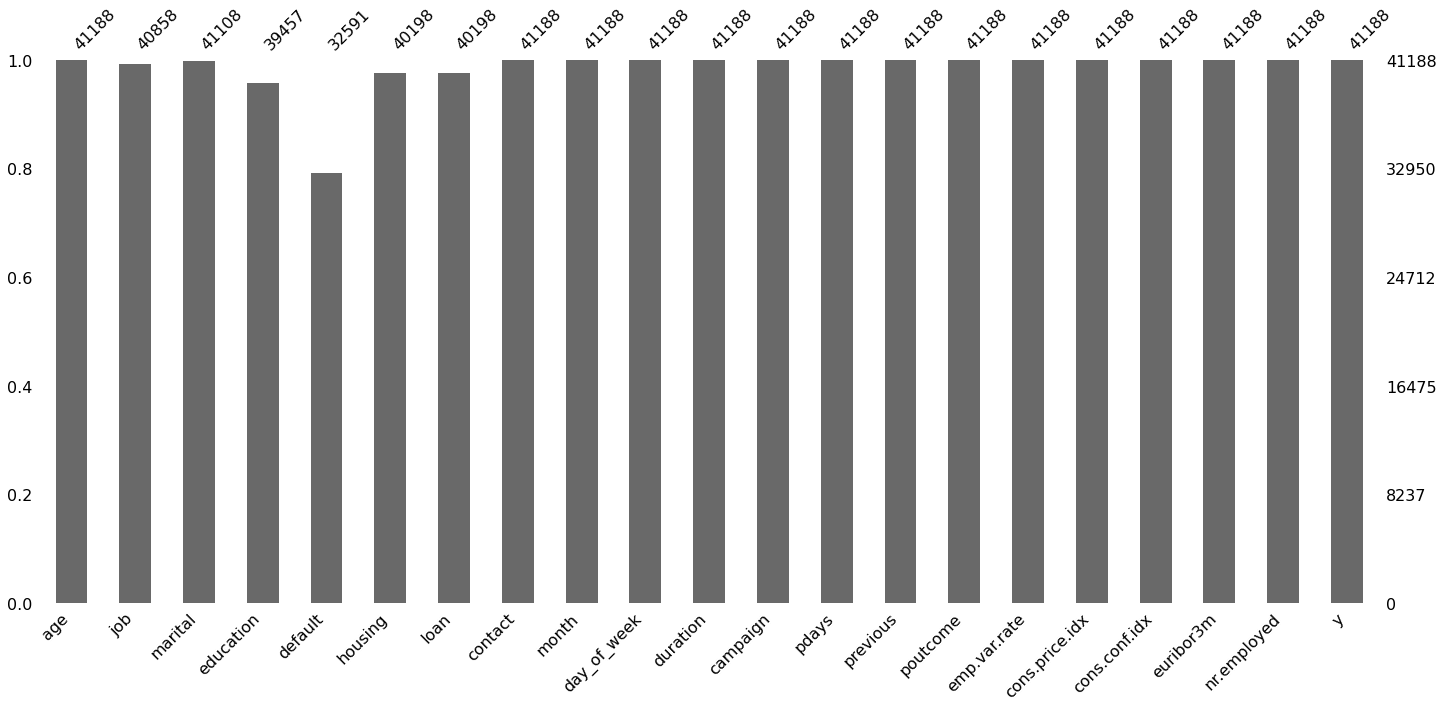

In [46]:
# Default has the most missing values

# Visualize the number of non missing values as a bar chart 
# Smaller bar has more missing data
msno.bar(data) 

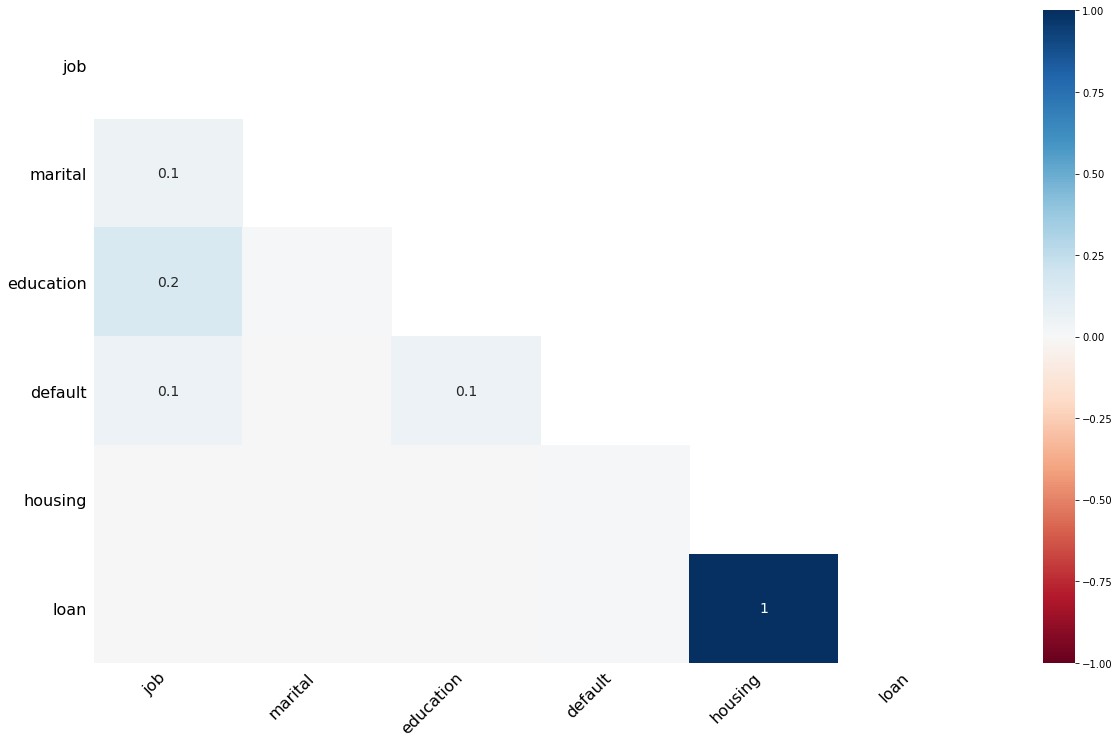

In [19]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 

# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.

msno.heatmap(data)

In [76]:
# get rows of missing default values
missing_default = data[data['default'].isnull()]

# get rows of not missing default values
not_missing_default = data[data['default'].notnull()]

In [77]:
# Target distribution of rows with missing values of default feature
no = missing_default.y.value_counts()[0]
yes = missing_default.y.value_counts()[1]
yes/(no+yes)

0.051529603350005816

In [78]:
# Target distribution of rows with missing values of default feature
no__ = not_missing_default.y.value_counts()[0]
yes__ = not_missing_default.y.value_counts()[1]
yes__/(no__+yes__)

0.1287778834647602

In [79]:
# Target distribution of rows of whole dataset
no_ = data.y.value_counts()[0]
yes_ = data.y.value_counts()[1]
yes_/(no_+yes_)

0.11265417111780131

# Ranges

In [76]:
data.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [75]:
data.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10296.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20593.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30890.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [96]:
profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling.html")

# Correlation

In [81]:
corr = data.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00


In [ ]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 15));

In [9]:
numCols = data.select_dtypes("number").columns
catCols = data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
len(numCols)

10

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


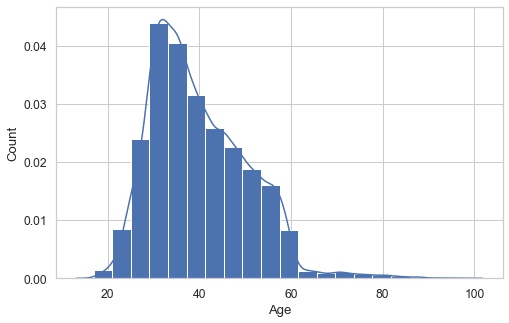

In [20]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]});
sns.distplot(
    data['age'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');

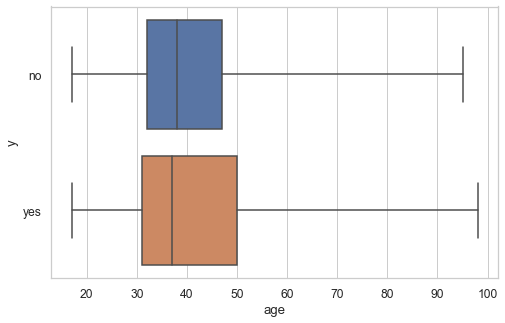

In [27]:
ax = sns.boxplot(x="age", y="y", data=data, whis=np.inf)
# ax = sns.stripplot(x="age", y="y", data=data, color=".3")